In [2]:
import os
import pandas as pd
import numpy as np
import math
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib import cm
from parse import *
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier as RandomForest
import random
from sklearn import linear_model
from datetime import datetime
import gc

pd.set_option("display.max_columns", 2000)


In [3]:
CHUNKSIZE = 100000

TRAIN_DATE        = "train_date.csv"
TRAIN_NUMERIC     = "train_numeric.csv"
TRAIN_CATEGORICAL = "train_categorical.csv"
TEST_DATE         = "test_date.csv"
TEST_NUMERIC      = "test_numeric.csv"
TEST_CATEGORICAL  = "test_categorical.csv"

SEED = 0
CHUNKSIZE = 50000
NROWS = 1200000

ID_COLUMN = 'Id'
TARGET_COLUMN = 'Response'
 

In [4]:
CHUNK_SIZE = 10000

start = datetime.now()

reader_num = pd.read_csv("../train_numeric.csv",chunksize=CHUNK_SIZE, dtype=np.float32, index_col='Id')

#分割して読み込み
loop = 0
cnt_0 = 0
cnt_1 = 0
for df_chunk in reader_num:
    
    df_0 = df_chunk[df_chunk['Response'] == 0]
    df_1 = df_chunk[df_chunk['Response'] == 1]
    
    if loop == 0:
        df = pd.concat([df_0, df_1])
    else:
        df = pd.concat([df, df_0, df_1])
    
    print("loop : {} / Rows = {}".format(loop, len(df.index)))

    loop = loop + 1
    
print("0:{}, 1:{}".format(cnt_0, cnt_1))
print("{} -> {}".format(start, datetime.now()))
print("Memory:{}".format(df.memory_usage(index=True).sum()))

loop : 0 / Rows = 10000
loop : 1 / Rows = 20000
loop : 2 / Rows = 30000
loop : 3 / Rows = 40000
loop : 4 / Rows = 50000
loop : 5 / Rows = 60000
loop : 6 / Rows = 70000
loop : 7 / Rows = 80000
loop : 8 / Rows = 90000
loop : 9 / Rows = 100000
loop : 10 / Rows = 110000
loop : 11 / Rows = 120000
loop : 12 / Rows = 130000
loop : 13 / Rows = 140000
loop : 14 / Rows = 150000
loop : 15 / Rows = 160000
loop : 16 / Rows = 170000
loop : 17 / Rows = 180000
loop : 18 / Rows = 190000
loop : 19 / Rows = 200000
loop : 20 / Rows = 210000
loop : 21 / Rows = 220000
loop : 22 / Rows = 230000
loop : 23 / Rows = 240000
loop : 24 / Rows = 250000
loop : 25 / Rows = 260000
loop : 26 / Rows = 270000
loop : 27 / Rows = 280000
loop : 28 / Rows = 290000
loop : 29 / Rows = 300000
loop : 30 / Rows = 310000
loop : 31 / Rows = 320000
loop : 32 / Rows = 330000
loop : 33 / Rows = 340000
loop : 34 / Rows = 350000
loop : 35 / Rows = 360000
loop : 36 / Rows = 370000
loop : 37 / Rows = 380000
loop : 38 / Rows = 390000
loop 

In [14]:
df.head()

,L1_S25_D2713,L1_S25_D2518,L1_S25_D2505,L1_S25_D2497,L1_S24_D1368,L1_S24_F1525,L1_S25_F1852,L1_S25_F2779,L3_S32_F3851,L3_S32_F3854,L0_S0_F0,L0_S0_F2,L0_S0_F4,L0_S0_F6,L0_S0_F8,L0_S0_F10,L0_S0_F12,L0_S0_F14,L0_S0_F16,L0_S0_F18,L0_S0_F20,L0_S0_F22,L0_S1_F24,L0_S1_F28,L0_S2_F32,L0_S2_F36,L0_S2_F40,L0_S2_F44,L0_S2_F48,L0_S2_F52,L0_S2_F56,L0_S2_F60,L0_S2_F64,L0_S3_F68,L0_S3_F72,L0_S3_F76,L0_S3_F80,L0_S3_F84,L0_S3_F88,L0_S3_F92,L0_S3_F96,L0_S3_F100,L0_S4_F104,L0_S4_F109,L0_S5_F114,L0_S5_F116,L0_S6_F118,L0_S6_F122,L0_S6_F132,L0_S7_F136,L0_S7_F138,L0_S7_F142,L0_S8_F144,L0_S8_F146,L0_S8_F149,L0_S9_F155,L0_S9_F160,L0_S9_F165,L0_S9_F170,L0_S9_F175,L0_S9_F180,L0_S9_F185,L0_S9_F190,L0_S9_F195,L0_S9_F200,L0_S9_F205,L0_S9_F210,L0_S10_F219,L0_S10_F224,L0_S10_F229,L0_S10_F234,L0_S10_F239,L0_S10_F244,L0_S10_F249,L0_S10_F254,L0_S10_F259,L0_S10_F264,L0_S10_F269,L0_S10_F274,L0_S11_F282,L0_S11_F286,L0_S11_F290,L0_S11_F294,L0_S11_F298,L0_S11_F302,L0_S11_F306,L0_S11_F310,L0_S11_F314,L0_S11_F318,L0_S11_F322,L0_S11_F326,L0_S12_F330,L0_S12_F332,L0_S12_F334,L0_S12_F336,L0_S12_F338,L0_S12_F340,L0_S12_F342,L0_S12_F344,L0_S12_F346,L0_S12_F348,L0_S12_F350,L0_S12_F352,L0_S13_F354,L0_S13_F356,L0_S14_F358,L0_S14_F362,L0_S14_F366,L0_S14_F370,L0_S14_F374,L0_S14_F378,L0_S14_F382,L0_S14_F386,L0_S14_F390,L0_S15_F394,L0_S15_F397,L0_S15_F400,L0_S15_F403,L0_S15_F406,L0_S15_F409,L0_S15_F412,L0_S15_F415,L0_S15_F418,L0_S16_F421,L0_S16_F426,L0_S17_F431,L0_S17_F433,L0_S18_F435,L0_S18_F439,L0_S18_F449,L0_S19_F453,L0_S19_F455,L0_S19_F459,L0_S20_F461,L0_S20_F463,L0_S20_F466,L0_S21_F472,L0_S21_F477,L0_S21_F482,L0_S21_F487,L0_S21_F492,L0_S21_F497,L0_S21_F502,L0_S21_F507,L0_S21_F512,L0_S21_F517,L0_S21_F522,L0_S21_F527,L0_S21_F532,L0_S21_F537,L0_S22_F546,L0_S22_F551,L0_S22_F556,L0_S22_F561,L0_S22_F566,L0_S22_F571,L0_S22_F576,L0_S22_F581,L0_S22_F586,L0_S22_F591,L0_S22_F596,L0_S22_F601,L0_S22_F606,L0_S22_F611,L0_S23_F619,L0_S23_F623,L0_S23_F627,L0_S23_F631,L0_S23_F635,L0_S23_F639,L0_S23_F643,L0_S23_F647,L0_S23_F651,L0_S23_F655,L0_S23_F659,L0_S23_F663,L0_S23_F667,L0_S23_F671,L1_S24_F679,L1_S24_F683,L1_S24_F687,L1_S24_F691,L1_S24_F700,L1_S24_F719,L1_S24_F728,L1_S24_F733,L1_S24_F746,L1_S24_F751,L1_S24_F756,L1_S24_F761,L1_S24_F766,L1_S24_F775,L1_S24_F780,L1_S24_F785,L1_S24_F790,L1_S24_F795,L1_S24_F800,L1_S24_F802,L1_S24_F806,L1_S24_F808,L1_S24_F810,L1_S24_F812,L1_S24_F814,L1_S24_F816,L1_S24_F829,L1_S24_F834,L1_S24_F839,L1_S24_F844,L1_S24_F857,L1_S24_F862,L1_S24_F867,L1_S24_F872,L1_S24_F877,L1_S24_F882,L1_S24_F887,L1_S24_F892,L1_S24_F897,L1_S24_F902,L1_S24_F907,L1_S24_F920,L1_S24_F925,L1_S24_F930,L1_S24_F935,L1_S24_F948,L1_S24_F953,L1_S24_F958,L1_S24_F963,L1_S24_F968,L1_S24_F973,L1_S24_F978,L1_S24_F983,L1_S24_F988,L1_S24_F993,L1_S24_F998,L1_S24_F1000,L1_S24_F1002,L1_S24_F1004,L1_S24_F1006,L1_S24_F1008,L1_S24_F1010,L1_S24_F1012,L1_S24_F1014,L1_S24_F1016,L1_S24_F1021,L1_S24_F1026,L1_S24_F1031,L1_S24_F1036,L1_S24_F1041,L1_S24_F1046,L1_S24_F1051,L1_S24_F1056,L1_S24_F1068,L1_S24_F1072,L1_S24_F1079,L1_S24_F1083,L1_S24_F1087,L1_S24_F1094,L1_S24_F1098,L1_S24_F1102,L1_S24_F1106,L1_S24_F1110,L1_S24_F1118,L1_S24_F1122,L1_S24_F1126,L1_S24_F1130,L1_S24_F1134,L1_S24_F1145,L1_S24_F1148,L1_S24_F1161,L1_S24_F1166,L1_S24_F1170,L1_S24_F1172,L1_S24_F1174,L1_S24_F1176,L1_S24_F1180,L1_S24_F1184,L1_S24_F1197,L1_S24_F1202,L1_S24_F1207,L1_S24_F1212,L1_S24_F1225,L1_S24_F1230,L1_S24_F1235,L1_S24_F1240,L1_S24_F1245,L1_S24_F1250,L1_S24_F1255,L1_S24_F1260,L1_S24_F1265,L1_S24_F1270,L1_S24_F1275,L1_S24_F1288,L1_S24_F1293,L1_S24_F1298,L1_S24_F1303,L1_S24_F1316,L1_S24_F1321,L1_S24_F1326,L1_S24_F1331,L1_S24_F1336,L1_S24_F1341,L1_S24_F1346,L1_S24_F1351,L1_S24_F1356,L1_S24_F1361,L1_S24_F1366,L1_S24_F1371,L1_S24_F1376,L1_S24_F1381,L1_S24_F1386,L1_S24_F1391,L1_S24_F1396,L1_S24_F1401,L1_S24_F1406,L1_S24_F1411,L1_S24_F1416,L1_S24_F1421,L1_S24_F1426,L1_S24_F1431,L1_S24_F1436,L1_S24_F1441,L1_S24_F1446,L1_S24_F1451,L1_S24_F1463,L1_S24_F1467,L1_S24_F1474,L1_S24_F1478,L1_S24_F1482,L1_S24_F1486,L1_S24_F1490,L1_S24_F1494,L1_S24_F1498,

In [5]:
from sklearn.model_selection import train_test_split

start = datetime.now()

## 教師データと訓練データに分離
y = df['Response']
X = df.drop('Response', axis=1)

## テストセットと訓練セットに分離
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
print(X_train.head())
print(y_train.head())

print(X_test.head())
print(y_test.head())

print("{} -> {}".format(start, datetime.now()))

           L0_S0_F0  L0_S0_F2  L0_S0_F4  L0_S0_F6  L0_S0_F8  L0_S0_F10  \
Id                                                                       
2335098.0    -0.199    -0.161    -0.015    -0.052    -0.013      0.025   
516059.0        NaN       NaN       NaN       NaN       NaN        NaN   
1000204.0     0.036     0.108    -0.052    -0.034     0.031      0.025   
400008.0     -0.016     0.026    -0.197    -0.197     0.074      0.070   
1555368.0     0.108     0.131     0.330     0.312    -0.056     -0.203   

           L0_S0_F12  L0_S0_F14  L0_S0_F16  L0_S0_F18  L0_S0_F20  L0_S0_F22  \
Id                                                                            
2335098.0      0.037      0.128     -0.235     -0.233      0.211      0.211   
516059.0         NaN        NaN        NaN        NaN        NaN        NaN   
1000204.0     -0.007     -0.112     -0.021     -0.014      0.222      0.222   
400008.0      -0.007     -0.072      0.025      0.029      0.044      0.044   
1555368

           L0_S0_F0  L0_S0_F2  L0_S0_F4  L0_S0_F6  L0_S0_F8  L0_S0_F10  \
Id                                                                       
278348.0      0.016     0.078    -0.361    -0.343     0.031     -0.112   
1329890.0       NaN       NaN       NaN       NaN       NaN        NaN   
280724.0      0.062     0.033     0.385     0.348     0.074      0.025   
501171.0      0.069     0.086    -0.033    -0.016     0.031     -0.021   
646335.0      0.121     0.019    -0.197    -0.179    -0.056      0.070   

           L0_S0_F12  L0_S0_F14  L0_S0_F16  L0_S0_F18  L0_S0_F20  L0_S0_F22  \
Id                                                                            
278348.0      -0.022     -0.192     -0.148     -0.110     -0.017     -0.017   
1329890.0        NaN        NaN        NaN        NaN        NaN        NaN   
280724.0      -0.015     -0.072      0.010     -0.062     -0.257     -0.257   
501171.0      -0.015     -0.072      0.030      0.067      0.327      0.327   
646335.

In [6]:
## 学習
import lightgbm as lgb
from sklearn.metrics import matthews_corrcoef, make_scorer
from sklearn.model_selection import GridSearchCV

start = datetime.now()

lgbm = lgb.LGBMClassifier(random_state=1,n_jobs=-1,verbose=2)
parameters = {'max_depth':[3,4,5], 'num_leaves':[8,16,32]}
mcc_scorer = make_scorer(matthews_corrcoef)
clf = GridSearchCV(lgbm, param_grid=parameters, scoring=mcc_scorer,verbose=2)
clf.fit(X_train, y_train.values.ravel())

print(clf.best_score_)
print(clf.best_params_)

delta = int((datetime.now() - start).total_seconds())
print(">>Execution Time -> {}:{:02}".format(int(delta/60), int(delta % 60)))

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] max_depth=3, num_leaves=8 .......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ........................ max_depth=3, num_leaves=8, total=  44.9s
[CV] max_depth=3, num_leaves=8 .......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   52.6s remaining:    0.0s
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ........................ max_depth=3, num_leaves=8, total=  44.4s
[CV] max_depth=3, num_leaves=8 .......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ........................ max_depth=3, num_leaves=8, total=  43.5s
[CV] max_depth=3, num_leaves=16 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=3, num_leaves=16, total=  44.9s
[CV] max_depth=3, num_leaves=16 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=3, num_leaves=16, total=  48.5s
[CV] max_depth=3, num_leaves=16 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=3, num_leaves=16, total=  44.3s
[CV] max_depth=3, num_leaves=32 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=3, num_leaves=32, total=  44.6s
[CV] max_depth=3, num_leaves=32 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=3, num_leaves=32, total=  44.1s
[CV] max_depth=3, num_leaves=32 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=3, num_leaves=32, total=  43.8s
[CV] max_depth=4, num_leaves=8 .......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ........................ max_depth=4, num_leaves=8, total=  45.2s
[CV] max_depth=4, num_leaves=8 .......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ........................ max_depth=4, num_leaves=8, total=  42.7s
[CV] max_depth=4, num_leaves=8 .......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ........................ max_depth=4, num_leaves=8, total=  45.5s
[CV] max_depth=4, num_leaves=16 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=4, num_leaves=16, total=  48.5s
[CV] max_depth=4, num_leaves=16 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=4, num_leaves=16, total=  45.6s
[CV] max_depth=4, num_leaves=16 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=4, num_leaves=16, total=  46.5s
[CV] max_depth=4, num_leaves=32 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=4, num_leaves=32, total=  47.6s
[CV] max_depth=4, num_leaves=32 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=4, num_leaves=32, total=  45.2s
[CV] max_depth=4, num_leaves=32 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=4, num_leaves=32, total=  46.0s
[CV] max_depth=5, num_leaves=8 .......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ........................ max_depth=5, num_leaves=8, total=  44.9s
[CV] max_depth=5, num_leaves=8 .......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ........................ max_depth=5, num_leaves=8, total=  43.4s
[CV] max_depth=5, num_leaves=8 .......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ........................ max_depth=5, num_leaves=8, total=  45.4s
[CV] max_depth=5, num_leaves=16 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=5, num_leaves=16, total=  45.6s
[CV] max_depth=5, num_leaves=16 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=5, num_leaves=16, total=  45.7s
[CV] max_depth=5, num_leaves=16 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=5, num_leaves=16, total=  48.1s
[CV] max_depth=5, num_leaves=32 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=5, num_leaves=32, total=  48.2s
[CV] max_depth=5, num_leaves=32 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=5, num_leaves=32, total=  46.8s
[CV] max_depth=5, num_leaves=32 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=5, num_leaves=32, total=  49.0s


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed: 24.1min finished


0.179389997743897
{'max_depth': 4, 'num_leaves': 16}
>>Execution Time -> 25:04


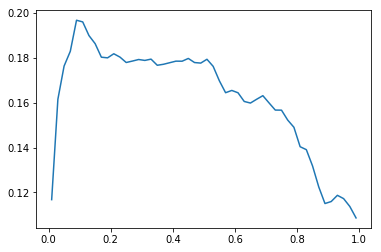

best threshold = 0.09
best mcc = 0.19667024169898262
>>Execution Time -> 0:15


In [7]:
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

start = datetime.now()

thresholds = np.linspace(0.01,0.99,50)
y_pred = clf.best_estimator_.predict_proba(X_test.values)[:,1]
mcc = np.array([metrics.matthews_corrcoef(y_test.values, y_pred>thr) for thr in thresholds])
plt.plot(thresholds, mcc)
plt.show()

best_thr = thresholds[mcc.argmax()]
print("best threshold = {}".format(best_thr))
print("best mcc = {}".format(mcc.max()))

delta = int((datetime.now() - start).total_seconds())
print(">>Execution Time -> {}:{:02}".format(int(delta/60), int(delta % 60)))

In [8]:
# 特徴量の表示
for i in range(0, X_train.shape[1]):
    print("{}:{}".format(X_train.columns[i], clf.best_estimator_.feature_importances_[i]))


L0_S0_F0:2
L0_S0_F2:4
L0_S0_F4:2
L0_S0_F6:3
L0_S0_F8:2
L0_S0_F10:1
L0_S0_F12:1
L0_S0_F14:0
L0_S0_F16:3
L0_S0_F18:2
L0_S0_F20:9
L0_S0_F22:0
L0_S1_F24:2
L0_S1_F28:2
L0_S2_F32:0
L0_S2_F36:3
L0_S2_F40:0
L0_S2_F44:5
L0_S2_F48:5
L0_S2_F52:0
L0_S2_F56:0
L0_S2_F60:4
L0_S2_F64:1
L0_S3_F68:0
L0_S3_F72:2
L0_S3_F76:0
L0_S3_F80:0
L0_S3_F84:2
L0_S3_F88:0
L0_S3_F92:1
L0_S3_F96:2
L0_S3_F100:7
L0_S4_F104:1
L0_S4_F109:5
L0_S5_F114:3
L0_S5_F116:8
L0_S6_F118:0
L0_S6_F122:1
L0_S6_F132:1
L0_S7_F136:1
L0_S7_F138:8
L0_S7_F142:1
L0_S8_F144:3
L0_S8_F146:0
L0_S8_F149:0
L0_S9_F155:1
L0_S9_F160:1
L0_S9_F165:2
L0_S9_F170:1
L0_S9_F175:0
L0_S9_F180:0
L0_S9_F185:2
L0_S9_F190:1
L0_S9_F195:0
L0_S9_F200:0
L0_S9_F205:0
L0_S9_F210:0
L0_S10_F219:3
L0_S10_F224:1
L0_S10_F229:2
L0_S10_F234:6
L0_S10_F239:0
L0_S10_F244:1
L0_S10_F249:2
L0_S10_F254:2
L0_S10_F259:6
L0_S10_F264:1
L0_S10_F269:0
L0_S10_F274:3
L0_S11_F282:2
L0_S11_F286:1
L0_S11_F290:4
L0_S11_F294:5
L0_S11_F298:0
L0_S11_F302:2
L0_S11_F306:1
L0_S11_F310:0
L0_S11_F314:1
L

# 全訓練データを用いて再学習

In [9]:
start = datetime.now()
clf_all = lgb.LGBMClassifier(random_state=1,n_jobs=-1,verbose=2, max_depth=clf.best_params_['max_depth'], num_leaves=clf.best_params_['num_leaves'])
clf_all.fit(X, y.values.ravel())
print(">>Execution Time -> {}:{:02}".format(int(delta/60), int(delta % 60)))

>>Execution Time -> 0:15


# テストデータを用いて予測

In [10]:
start = datetime.now()

reader_test_num = pd.read_csv("../test_numeric.csv",chunksize=CHUNK_SIZE, dtype=np.float32)

#分割して読み込み
loop = 0
for df_chunk_test_num in reader_test_num:
        
    df_test_id_chunk = df_chunk_test_num['Id']   
    df_features_chunk = df_chunk_test_num.drop('Id', axis=1)
    
    ##予測
    ary_test_chunk_pred = clf.predict_proba(df_features_chunk.values)[:,1]
    y_submit = ary_test_chunk_pred > best_thr

    df_test_chunk_pred = pd.DataFrame({'Id':df_test_id_chunk.values, 'Response':y_submit})
    
    if loop == 0:
        df_test_pred = df_test_chunk_pred
    else:
        df_test_pred = pd.concat([df_test_pred, df_test_chunk_pred])
    
    print("loop : {} / Rows = {}".format(loop, len(df_test_pred.index)))
    
    loop = loop + 1



loop : 0 / Rows = 10000
loop : 1 / Rows = 20000
loop : 2 / Rows = 30000
loop : 3 / Rows = 40000
loop : 4 / Rows = 50000
loop : 5 / Rows = 60000
loop : 6 / Rows = 70000
loop : 7 / Rows = 80000
loop : 8 / Rows = 90000
loop : 9 / Rows = 100000
loop : 10 / Rows = 110000
loop : 11 / Rows = 120000
loop : 12 / Rows = 130000
loop : 13 / Rows = 140000
loop : 14 / Rows = 150000
loop : 15 / Rows = 160000
loop : 16 / Rows = 170000
loop : 17 / Rows = 180000
loop : 18 / Rows = 190000
loop : 19 / Rows = 200000
loop : 20 / Rows = 210000
loop : 21 / Rows = 220000
loop : 22 / Rows = 230000
loop : 23 / Rows = 240000
loop : 24 / Rows = 250000
loop : 25 / Rows = 260000
loop : 26 / Rows = 270000
loop : 27 / Rows = 280000
loop : 28 / Rows = 290000
loop : 29 / Rows = 300000
loop : 30 / Rows = 310000
loop : 31 / Rows = 320000
loop : 32 / Rows = 330000
loop : 33 / Rows = 340000
loop : 34 / Rows = 350000
loop : 35 / Rows = 360000
loop : 36 / Rows = 370000
loop : 37 / Rows = 380000
loop : 38 / Rows = 390000
loop 

In [11]:
df_test_pred['Id'] = df_test_pred.Id.astype('int')    
df_test_pred['Response'] = df_test_pred.Response.astype('bool')
df_test_pred.head()

,Id,Response
0,1,False
1,2,False
2,3,False
3,5,False
4,8,False


In [12]:
##CSV出力
y_submit = df_test_pred
type(y_submit)
y_submit.to_csv("submit_last_onlynum.csv", columns=['Id', 'Response'], index=False)

In [13]:
y_submit.Response.sum()

5880

In [41]:
y_submit.head()

,Id,Response
0,1.0,False
1,2.0,False
2,3.0,False
3,5.0,False
4,8.0,False
